In [49]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [50]:
import utils.variables

In [51]:
os.getcwd()

'/home/sean/Documentos/the_bridge_bootcamp/My_Workspaces/Fish_EDA'

In [52]:
fish_quantity_value = pd.read_csv("./data/Aquaculture_Quantity_Value_Code_Merged.csv")
fish_quantity_value.shape

(75737, 12)

# Hypotheses
- Freshwater fish production (through fish farming) is replacing marine production.
- Africa lags behind other parts of world in freshwater fish farming
- Fish farming in Africa has potential to grow and improve

# Some key questions
- What are the dominant species per water environment over time?
- How has ratio of freshwater:marine changed over time? Has proportion of freshwater increased.
- Similar change with brackishwater:marine.
- Which countries produce the most marine, fresh and brackish water fish?
- How has freshwater fish production in Africa evolved?
- Which countries produce the most tilapia?
- Which species of tilapia is the most farmed?


In [53]:
fish_quantity_value.head()

,PERIOD,Quantity,ValueUSD,Country,WaterArea,Environment,Species,Scientific_Name,Measure_Unit_Quantity,Measure_Unit_ValueUSD,Statistical_Symbol_Quantity,Statistical_Symbol_ValueUSD
0,2020,8000.0,18746.696,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,Tonnes - live weight,Value (USD 1000),ESTIMATE,ESTIMATE
1,2019,7950.0,18407.998,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,Tonnes - live weight,Value (USD 1000),ESTIMATE,ESTIMATE
2,2018,7900.0,17535.281,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,Tonnes - live weight,Value (USD 1000),ESTIMATE,ESTIMATE
3,2017,6950.0,16346.474,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,Tonnes - live weight,Value (USD 1000),ESTIMATE,ESTIMATE
4,2016,6100.0,14381.263,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,Tonnes - live weight,Value (USD 1000),ESTIMATE,ESTIMATE


<AxesSubplot:xlabel='PERIOD', ylabel='Quantity'>

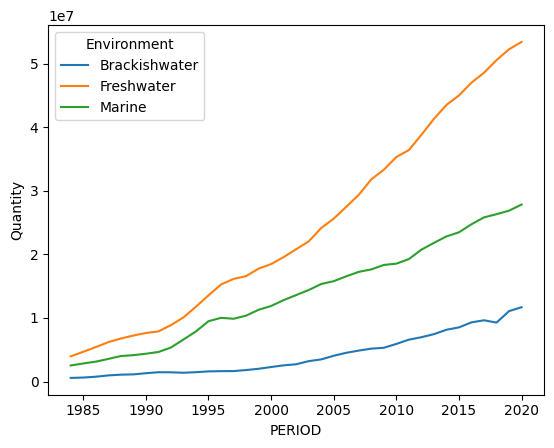

In [54]:
global_total_environment = fish_quantity_value.groupby(['PERIOD', 'Environment'], as_index=False)['Quantity'].sum()
global_total_environment
sns.lineplot(data = global_total_environment, x = 'PERIOD', y = 'Quantity', hue = 'Environment')

In [55]:
fish_quantity_value_inland = fish_quantity_value[(fish_quantity_value['WaterArea'].str.contains('Inland')) & (~fish_quantity_value['WaterArea'].str.contains('USSR'))]
fish_quantity_value_oceanic = fish_quantity_value[~fish_quantity_value['WaterArea'].str.contains('Inland')]

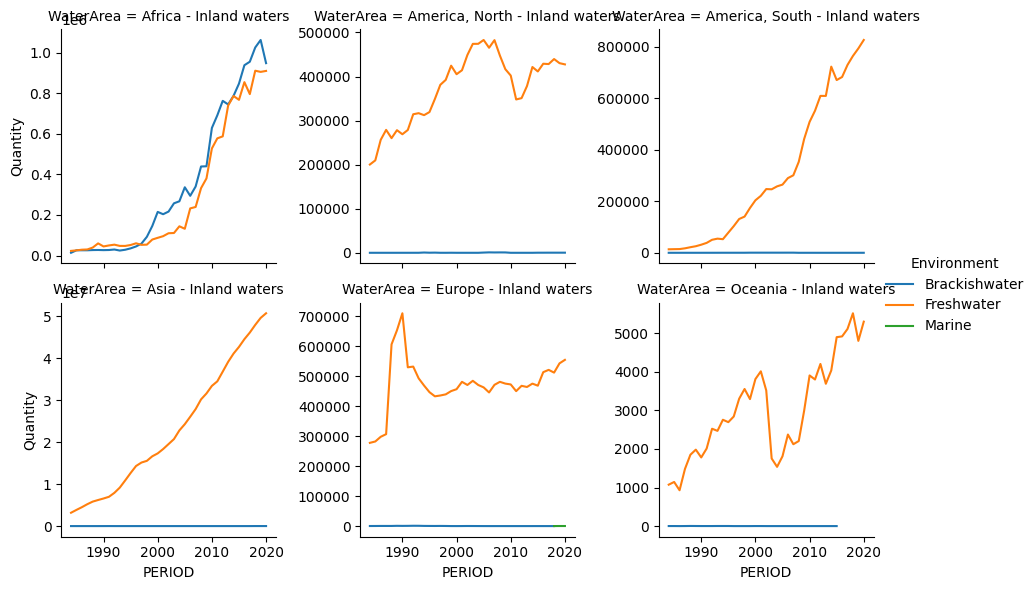

In [56]:
inland_waterArea_total_environment = fish_quantity_value_inland.groupby(['WaterArea', 'Environment', 'PERIOD'], as_index=False)['Quantity'].sum()

g = sns.FacetGrid(inland_waterArea_total_environment, col = "WaterArea", hue = 'Environment', sharey = False, col_wrap = 3)
g.map(sns.lineplot, 'PERIOD', 'Quantity')
g.add_legend()

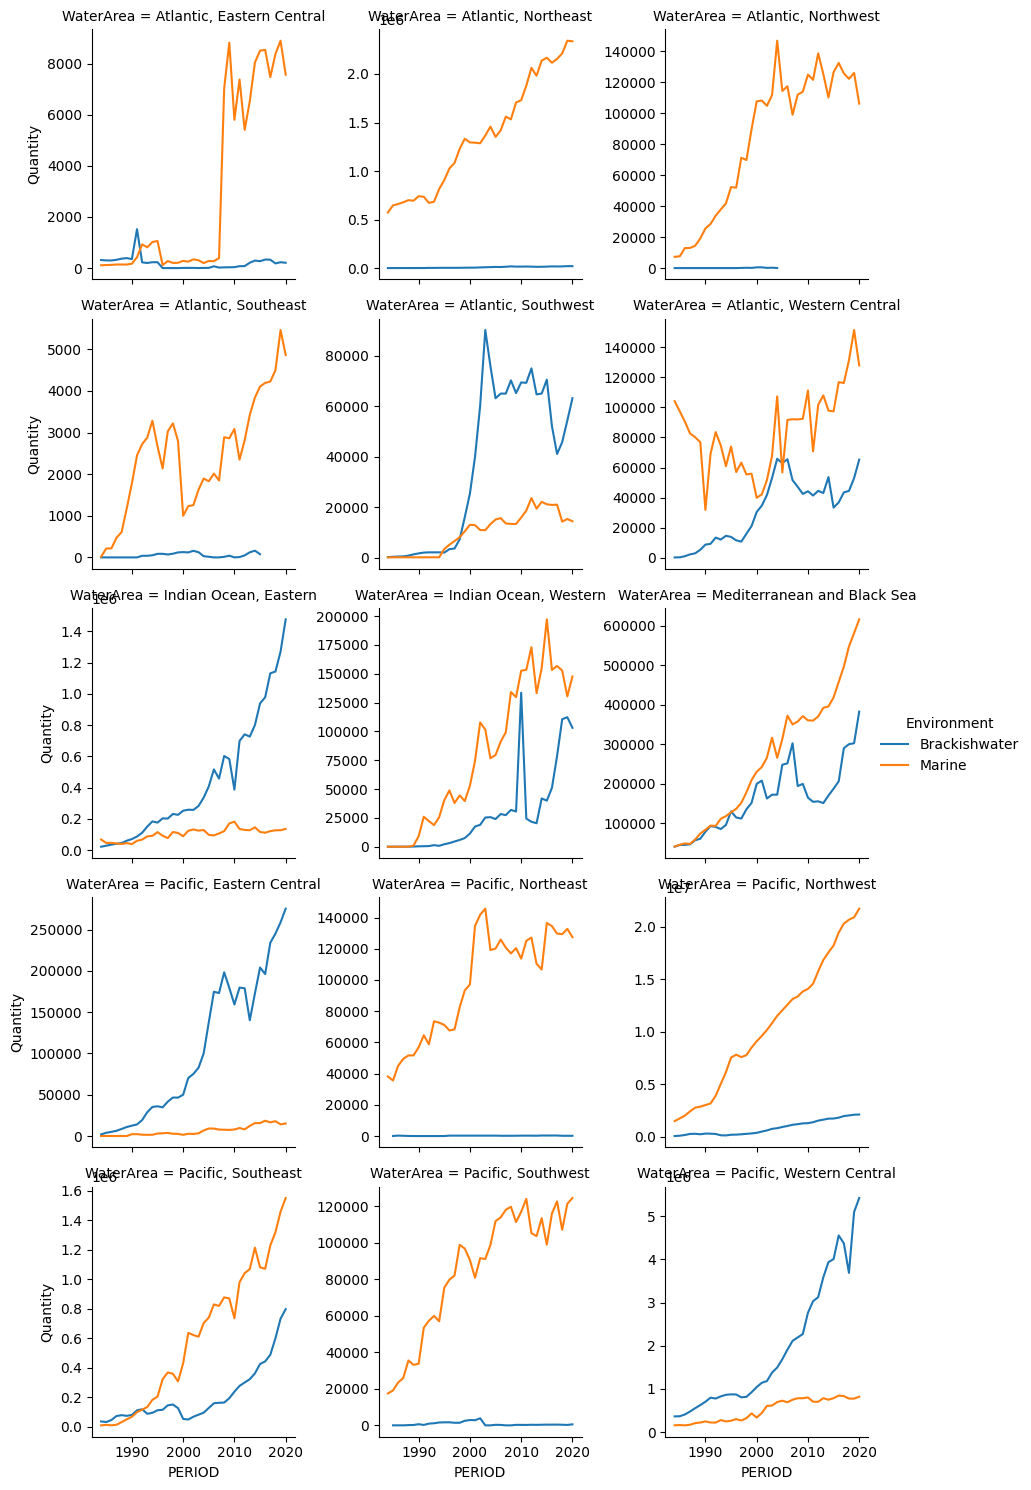

In [57]:
oceanic_waterArea_total_environment = fish_quantity_value_oceanic.groupby(['WaterArea', 'Environment', 'PERIOD'], as_index=False)['Quantity'].sum()

g = sns.FacetGrid(oceanic_waterArea_total_environment, col = "WaterArea", hue = 'Environment', sharey = False, col_wrap = 3)
g.map(sns.lineplot, 'PERIOD', 'Quantity')
g.add_legend()

In [58]:
species_quant_area_environment = fish_quantity_value.groupby(['WaterArea', 'Environment', 'Species'], as_index=False)['Quantity'].sum()
species_quant_area_environment

,WaterArea,Environment,Species,Quantity
0,Africa - Inland waters,Brackishwater,Bagrid catfish,7904.000
1,Africa - Inland waters,Brackishwater,Black catfishes nei,58.000
2,Africa - Inland waters,Brackishwater,Blackchin tilapia,240.000
3,Africa - Inland waters,Brackishwater,Blue tilapia,6603.000
4,Africa - Inland waters,Brackishwater,Cyprinids nei,1239344.000
...,...,...,...,...
1383,"Pacific, Western Central",Marine,Tilapias nei,154.140
1384,"Pacific, Western Central",Marine,Tropical spiny lobsters nei,22225.027
1385,"Pacific, Western Central",Marine,White-spotted spinefoot,13.141
1386,"Pacific, Western Central",Marine,Whiteleg shrimp,2.811


So now focus on the inland waters (both fresh and brackish?) for Africa and Asia. Take the fish that appear as top 3 produced across the years and then plot these out per year for Africa and Asia inland.

In [59]:
top_inland_species_afica = species_quant_area_environment.loc[(species_quant_area_environment['WaterArea'] == 'Africa - Inland waters') & (species_quant_area_environment['Environment'] == 'Freshwater'), ['Species', 'Quantity']].sort_values('Quantity', ascending=False)['Species'][:3]
top_inland_species_afica

60             Nile tilapia
62    North African catfish
36              Common carp
Name: Species, dtype: object

In [60]:
top_inland_species_asia = species_quant_area_environment.loc[(species_quant_area_environment['WaterArea'] == 'Asia - Inland waters') & (species_quant_area_environment['Environment'] == 'Freshwater'), ['Species', 'Quantity']].sort_values('Quantity', ascending=False)['Species'][:3]
top_inland_species_asia

335                Silver carp
272    Grass carp(=White amur)
251                Common carp
Name: Species, dtype: object

In [61]:
top_inland_species_africa_asia = pd.concat([top_inland_species_afica, top_inland_species_asia])
africa_asia_inland = ['Africa - Inland waters', 'Asia - Inland waters']

In [62]:
top_inland_fresh_fish_quant_africa_asia = fish_quantity_value[(fish_quantity_value['Species'].isin(top_inland_species_africa_asia)) & (fish_quantity_value['WaterArea'].isin(africa_asia_inland)) & (fish_quantity_value['Environment'] == 'Freshwater')]

top_inland_fresh_fish_quant_africa_asia = top_inland_fresh_fish_quant_africa_asia.groupby(['PERIOD','WaterArea', 'Environment', 'Species'], as_index=False)['Quantity'].sum()

top_inland_fresh_fish_quant_africa_asia['Quantity_Norm'] = np.where(top_inland_fresh_fish_quant_africa_asia['WaterArea'] == 'Asia - Inland waters', (top_inland_fresh_fish_quant_africa_asia['Quantity'] / 3.46), top_inland_fresh_fish_quant_africa_asia['Quantity'])

top_inland_fresh_fish_quant_africa_asia.head()

,PERIOD,WaterArea,Environment,Species,Quantity,Quantity_Norm
0,1984,Africa - Inland waters,Freshwater,Common carp,12368.0,12368.000000
1,1984,Africa - Inland waters,Freshwater,Grass carp(=White amur),2.0,2.000000
2,1984,Africa - Inland waters,Freshwater,Nile tilapia,3224.0,3224.000000
3,1984,Africa - Inland waters,Freshwater,North African catfish,118.0,118.000000
4,1984,Asia - Inland waters,Freshwater,Common carp,283883.0,82047.109827


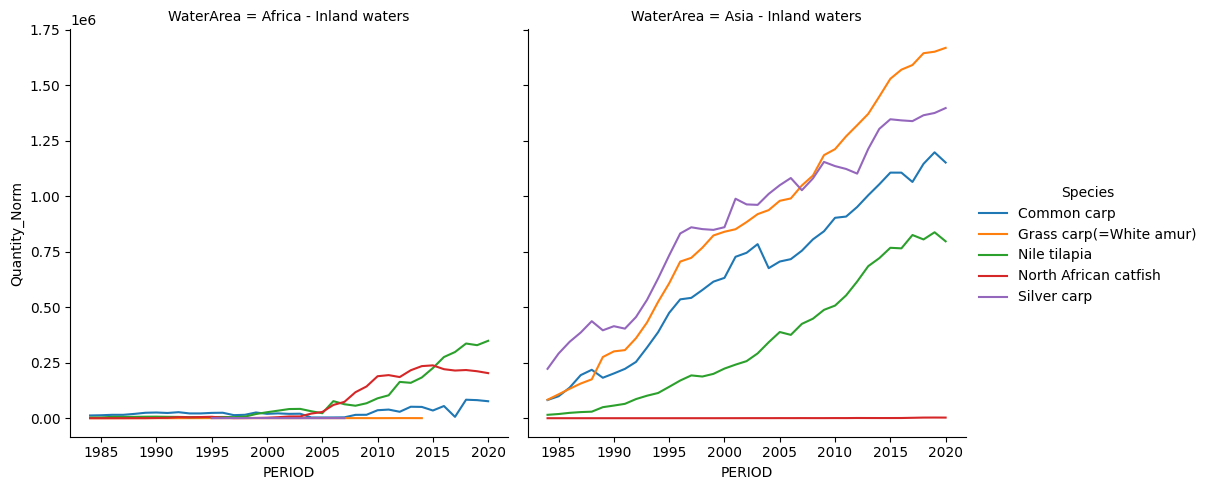

In [63]:
g = sns.FacetGrid(top_inland_fresh_fish_quant_africa_asia, col = "WaterArea", hue = 'Species', sharey = True, height = 5)
g.map(sns.lineplot, 'PERIOD', 'Quantity_Norm')
g.add_legend()

Inland, freshwater fish production in Africa only really started in 2005 while in Asia it has been growing since records began in 1980s. 2 species dominate in Africa: Nile tilapia and north african catfish. While in Asia the common, grass and silver carp are the most produced with Nile tilapia in 4th place. 

Only focusing on the nile tilapia, we see that Asia still produces way more

In [64]:
tilapia = top_inland_fresh_fish_quant_africa_asia[top_inland_fresh_fish_quant_africa_asia['Species'] == "Nile tilapia"]
tilapia

,PERIOD,WaterArea,Environment,Species,Quantity,Quantity_Norm
2,1984,Africa - Inland waters,Freshwater,Nile tilapia,3224.000,3224.000000
6,1984,Asia - Inland waters,Freshwater,Nile tilapia,52827.000,15267.919075
11,1985,Africa - Inland waters,Freshwater,Nile tilapia,3414.000,3414.000000
15,1985,Asia - Inland waters,Freshwater,Nile tilapia,65256.000,18860.115607
20,1986,Africa - Inland waters,Freshwater,Nile tilapia,5963.000,5963.000000
...,...,...,...,...,...,...
321,2018,Asia - Inland waters,Freshwater,Nile tilapia,2787686.920,805689.861272
325,2019,Africa - Inland waters,Freshwater,Nile tilapia,329159.445,329159.445000
329,2019,Asia - Inland waters,Freshwater,Nile tilapia,2899540.316,838017.432370
333,2020,Africa - Inland waters,Freshwater,Nile tilapia,348792.967,348792.967000


<AxesSubplot:xlabel='PERIOD', ylabel='Quantity_Norm'>

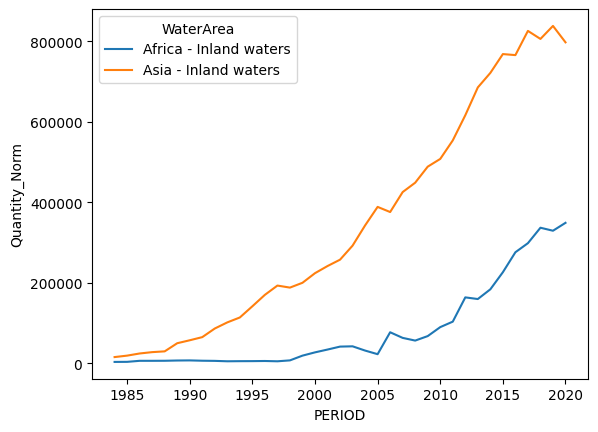

In [66]:
sns.lineplot(data = tilapia, x = 'PERIOD', y = 'Quantity_Norm', hue = 'WaterArea')